In [110]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import load_boston

## 載入資料

In [111]:
# 載入資料集
boston_dataset = load_boston()
# 將資料轉換成pd.DataFrame格式。目標輸出是MEDIV，剩下的就是特徵即為輸入特徵。
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
# 查看資料分布狀況
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 離群值分析
以 `LSTAT` 特徵舉例。我們可以透過 boxplot 來查看該特徵在 506 筆資料中的分布狀況，我們可以看出平均值約 12，最大值接近 38，最小值接近 2。我們可以發現大於 32 以外有多個零散的數據點，這些資料我們可以來分析是否為異常點。因為這些異常點所造成的離群值可能會造成特徵的分布狀況嚴重的偏移。

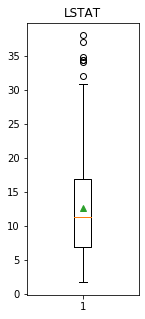

In [10]:
plt.figure(figsize=(2,5))
plt.boxplot(boston['LSTAT'],showmeans=True)
plt.title('LSTAT')
plt.show()

## 分布狀態

### LSTAT 特徵觀察
我們可以發現 LSTAT 特徵呈現右偏。透過 Pandas 計算該特徵的偏度與峰度。由結果可以得知偏度 `0.91>0` 呈右偏，而峰度 `0.49>0` 呈現高峽峰形狀。

偏度(Skewness): 0.91, 峰度(Kurtosis): 0.49


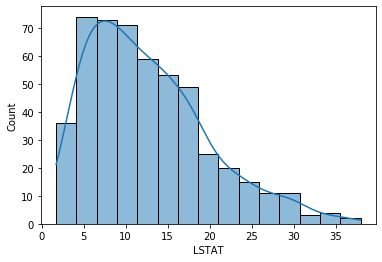

In [122]:
# 使用的資料是 LSTAT: 區域中被認為是低收入階層的比例
# skewness 與 kurtosis
skewness = round(boston['LSTAT'].skew(), 2)
kurtosis = round(boston['LSTAT'].kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(boston['LSTAT'], kde=True)
plt.show()

### AGE 特徵觀察
我們可以發現 AGE 特徵呈現左偏。透過 Pandas 計算該特徵的偏度與峰度。由結果可以得知偏度 `-0.6<0` 呈左偏，而峰度 `-0.97<0` 呈現低潤峰形狀。

偏度(Skewness): -0.6, 峰度(Kurtosis): -0.97


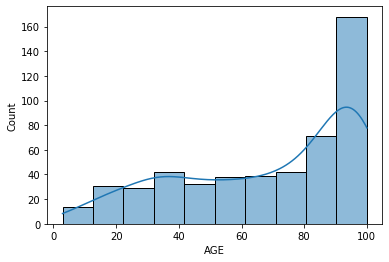

In [184]:
# 使用的資料是 AGE: 1940年之前建成的自用房屋比例
#skewness 與 kurtosis
skewness = round(boston['AGE'].skew(), 2)
kurtosis = round(boston['AGE'].kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(boston['AGE'], kde=True)
plt.show()

## 修正資料偏態的方法
在數學統計或是機器學習中我們都會提出假設，前提是資料樣本是具有常態分佈。我們可以透過剛剛所講的偏度與峰度來評估特徵的分布狀態，或是透過直方圖與核密度估計視覺化查看資料分布。當資料呈現單峰偏斜時，我們會透過一些資料轉換技巧，讓所有資料能夠修正回常態分佈。以下整幾幾個常見的修正特徵偏度的方法：

- 對數轉換 (資料不能有0或負數)
- 平方根轉換 (資料不能是負數)
- 立方根轉換
- 次方轉換 (只能處理左偏)
- Box-Cox 轉換
- 移除離群值

### 對數轉換
因為資料型態左偏，因此我們可以透過取對數來將資料拉回使為更集中。

偏度(Skewness): -0.32, 峰度(Kurtosis): -0.43


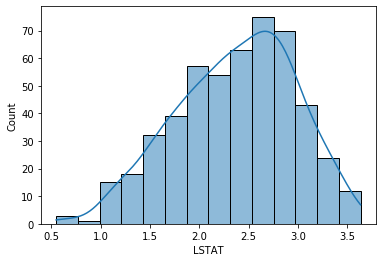

In [202]:
transform_data = np.log(boston['LSTAT'])
# skewness 與 kurtosis
skewness = round(transform_data.skew(), 2)
kurtosis = round(transform_data.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(transform_data, kde=True)
plt.show()

偏度(Skewness): -0.19, 峰度(Kurtosis): -0.59


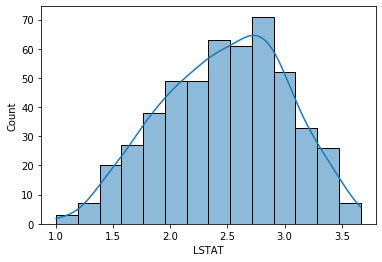

In [204]:
transform_data = np.log1p(boston['LSTAT'])
# skewness 與 kurtosis
skewness = round(transform_data.skew(), 2)
kurtosis = round(transform_data.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(transform_data, kde=True)
plt.show()

## 平方根轉換

偏度(Skewness): 0.31, 峰度(Kurtosis): -0.48


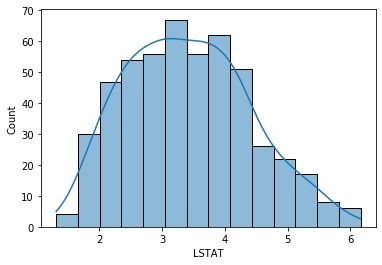

In [181]:
transform_data = boston['LSTAT']**(1/2)
# skewness 與 kurtosis
skewness = round(transform_data.skew(), 2)
kurtosis = round(transform_data.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(transform_data, kde=True)
plt.show()

## 立方根轉換

偏度(Skewness): 0.1, 峰度(Kurtosis): -0.59


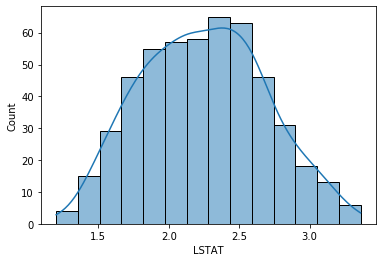

In [205]:
transform_data = boston['LSTAT']**(1/3)
# skewness 與 kurtosis
skewness = round(transform_data.skew(), 2)
kurtosis = round(transform_data.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(transform_data, kde=True)
plt.show()

## 次方轉換
次方轉換僅能使用在偏左的資料上。

偏度(Skewness): -0.18, 峰度(Kurtosis): -1.49


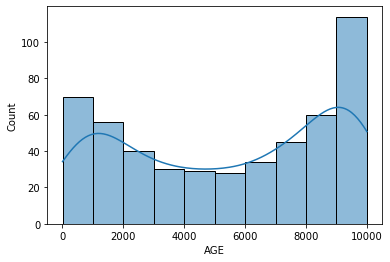

In [200]:
transform_data = np.power(boston['AGE'], 2)
# skewness 與 kurtosis
skewness = round(transform_data.skew(), 2)
kurtosis = round(transform_data.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(transform_data, kde=True)
plt.show()

## Box-Cox 轉換

偏度(Skewness): -0.03, 峰度(Kurtosis): -0.59


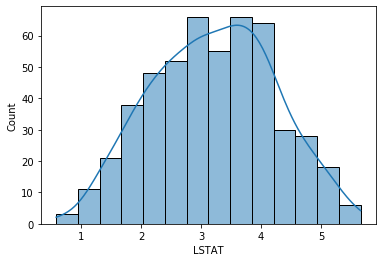

In [206]:
from scipy.stats import boxcox
transform_data, lam = boxcox(boston['LSTAT'])
transform_data = pd.DataFrame(transform_data, columns=['LSTAT'])['LSTAT']
# skewness 與 kurtosis
skewness = round(transform_data.skew(), 2)
kurtosis = round(transform_data.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(transform_data, kde=True)
plt.show()

## 移除離群值

In [186]:
# 將所有特徵超出1.5倍IQR的概念將這些Outlier先去掉，避免對Model造成影響
print ("Shape Of The Before Ouliers: ",boston['LSTAT'].shape)
n=1.5
#IQR = Q3-Q1
IQR = np.percentile(boston['LSTAT'],75) - np.percentile(boston['LSTAT'],25)
# outlier = Q3 + n*IQR 
transform_data=boston[boston['LSTAT'] < np.percentile(boston['LSTAT'],75)+n*IQR]
# outlier = Q1 - n*IQR 
transform_data=transform_data[transform_data['LSTAT'] > np.percentile(transform_data['LSTAT'],25)-n*IQR]['LSTAT']
print ("Shape Of The After Ouliers: ",transform_data.shape)

Shape Of The Before Ouliers:  (506,)
Shape Of The After Ouliers:  (499,)


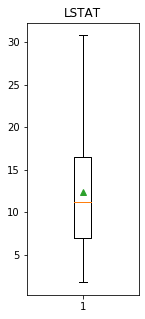

In [187]:
plt.figure(figsize=(2,5))
plt.boxplot(transform_data,showmeans=True)
plt.title('LSTAT')
plt.show()